# CH2 - 監督式學習(經典) 

In [1]:
# 載入常用套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2-1: 線性迴歸 (Linear Regression)

## 波士頓房價範例

由於CH1已經介紹過此資料集，因此這邊我們忽略探索資料的步驟，直接介紹如何建立模型。

### 1. 讀取資料

In [2]:
# 載入波士頓房價資料套件
from sklearn.datasets import load_boston
# 讀取資料
boston = load_boston()


### 2. 切割資料集

In [3]:
# 載入資料切割套件
from sklearn.model_selection import train_test_split
# 切割資料
x_train, x_test, y_train, y_test = train_test_split(boston['data'], boston['target'], # x,y
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

### 3. 建立模型

#### 訓練流程步驟

1. 訓練模型時，我們會將訓練資料集的特徵變數(x_train)與目標變數(y_train)倒入模型學習。
2. 測試時，則是將預測的目標變數(y_test)隱藏起來當作不知道，只把測試資料集中的特徵變數(x_test)倒入學好的模型。
3. 模型會根據過去的訓練資料去學習：輸入怎麼樣的x會產生怎麼樣的y，因此我們只要把x_test給模型，他就會預測出相對應的結果(pred)。
4. 衡量績效的方式就是根據比對預測結果(pred)跟真實結果(y_test)的差異(有很多種計算方式，如：MSE, RMSE等)，來評量該模型的預測準度。

#### 模型參數(parameters)

+ 模型都有參數可以進行調整，愈複雜的模型可以調整的參數愈多。
+ 不同資料對應模型參數會有不同結果，參數的不同可能大大的影響模型的績效。
+ 之後遇到較為複雜的模型，我們會簡單的介紹一下哪些常用參數是資料科學家會去調整的，以及調整的值範圍落在哪。

#### 模型特徵(attributes)

+ 每個模型製作完成後，都會產生一些特徵可以取用，例如：截距項、係數項、模型分數等等。

#### 線性迴歸參數與特徵：

+ 常用模型特徵
    + coef_：取得模型係數。
    + intercept_：取得模型截距項。
+ 參考文件：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 。

In [4]:
# 載入線性迴歸套件
from sklearn.linear_model import LinearRegression 
# 建立模型
model = LinearRegression() # 括號內可以放參數，因為線性迴歸是很簡單的模型，通常我們不太需要調整參數，因此這邊留空白即可。
# 將資料餵給模型
model.fit(x_train, y_train) 

LinearRegression()

### 4. 預測
可以看出有時候預測值(pred_y)和真實值(actual_y)仍有些差距，此差距即為殘差(Residual)。

In [5]:
pred = model.predict(x_test)
# 印出預測結果
pd.DataFrame({'actual_y':y_test,'pred_y':pred})

,actual_y,pred_y
0,21.7,22.642678
1,15.6,15.629779
2,20.0,22.195245
3,12.8,13.386680
4,50.0,37.568783
...,...,...
147,17.7,21.177686
148,20.8,23.077890
149,10.5,12.792035
150,11.5,14.705347


### 5. 模型績效衡量

+ 若想快速看模型的表現，可以使用model底下的score(在建模的過程就會產生)來查看。
+ 若想要看指定的指標，則可以使用 sklearn.metrics 這個套件。
    + 裡面內有很多迴歸和分類模型的衡量指標可以使用，這裡取用迴歸常用的R-square, MAE, MSE 跟 RMSE 示範。
    + 想使用其他指標，可以參考文件說明：https://scikit-learn.org/stable/modules/model_evaluation.html 。


In [6]:
# 載入迴歸模型績效指標
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# 印出預測績效(R-square)
print(f'Linear Regressor\'s score: {model.score(x_test, y_test)}') 
# 印出其他迴歸績效指標
pd.DataFrame({'R-square': r2_score(y_test, pred), 'MAE': mean_absolute_error(y_test, pred), 'MSE': mean_squared_error(y_test, pred), 'RMSE': mean_squared_error(y_test, pred, squared=False)}, index=['value'])

Linear Regressor's score: 0.6663986272835627


,R-square,MAE,MSE,RMSE
value,0.666399,3.362624,21.682012,4.656395


# 2-2: 羅吉斯迴歸 (Logistic Regression)

## 銀行分類範例

商業上經常會遇到的分類問題就是：顧客下次是否會回購? <br>
我們從kaggle中找到一個銀行行銷的資料案例，使用kaggle資料的好處在於kaggle中的資料都有特徵變數的簡介，並且也有其他人對該資料進行分析的分享可供參考，讓自己在做分析時可以事半功倍。<br>
資料來源：https://www.kaggle.com/henriqueyamahata/bank-marketing 。

變數說明：

「顧客資料」
+ Age : 年齡。 (數值變數)
+ Job : 工作的類型。 (類別變數: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
+ Marital : 婚姻狀態。 (類別變數: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
+ Education : 教育程度。 (類別變數: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
+ Default: 是否有違約信用。 (類別變數: 'no', 'yes', 'unknown')
+ Housing: 是否有房屋貸款。 (類別變數: 'no', 'yes', 'unknown')
+ Loan: 是否有個人貸款。 (類別變數: 'no', 'yes', 'unknown')

「電話推銷資料」
+ Contact: 通訊類型。 (類別變數: 'cellular','telephone')
+ Month: 最後一次聯繫的月份。 (類別變數: categorical: 'jan', 'feb', … , 'nov', 'dec')
+ Dayofweek: 最後一次聯繫的星期。 (類別變數:'mon','tue','wed','thu','fri')
+ Duration: 最後一次聯繫的通話時間，單位為秒數。 (數值變數)
    + 重要提醒：此屬性將會嚴重影響目標變數（例如，如果Duration=0，則 y ='no'）。然而，通話被執行前的持續時間是未知。同樣，在通話結束後，y顯然是已知的。因此，應僅出於作為基準的目的再放入此特徵；如果實用上打算進行即時的預測，則應將其從模型丟棄(因為本應為未知)。

「其他特徵」
+ Campaign: 在廣告活動期間對該客戶進行的聯繫次數。 (數值變數)
+ Pdays: 客戶從最近一個廣告被聯繫後所經過的天數。 (數值變數，999表示該客戶之前未被聯繫過。)
+ Previous: 客戶在這次廣告之前的聯繫次數。 (數值變數)
+ Poutcome: 最近一次對這個客戶的廣告是否成功。 (類別變數: 'failure','nonexistent','success')

「社會經濟指標」
+ Emp.var.rate: 就業變動率-季度指標。 (數值變數)
+ Cons.price.idx: 消費者物價指數-每月指標。 (數值變數)
+ Cons.conf.idx: 消費者信心指數-每月指標。 (數值變數)
+ Euribor3m: euribor 3個月率-每日指標。 (數值變數)
+ Nr.employed: 僱員人數-季度指標。 (數值變數)

### 1. 載入與探索資料

參考範例: https://www.kaggle.com/henriqueyamahata/bank-marketing-classification-roc-f1-recall 。

In [7]:
bank = pd.read_csv('dataset/bank-additional-full.csv', sep = ';') # 此資料是以';'作為分隔符號儲存，因此sep參數要指定用';'(默認分割符號為逗號)。
# 檢查欄位
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### 顧客資料：

In [9]:
bank_client = bank.iloc[: , 0:7] # 將顧客資料提出查看
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


年齡分佈

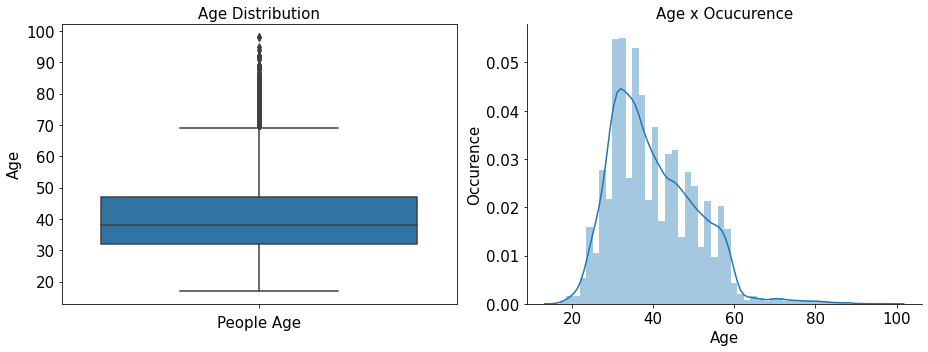

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5)) # 將兩張子圖畫在同一張內的設定
# 畫年齡的盒鬚圖以計算年齡變數的敘述性統計
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1) # 畫盒鬚圖
ax1.set_xlabel('People Age', fontsize=15) # 設定x座標軸名稱
ax1.set_ylabel('Age', fontsize=15)        # 設定y座標軸名稱
ax1.set_title('Age Distribution', fontsize=15)  # 設定圖標題
ax1.tick_params(labelsize=15)                   # 設定軸刻度字體大小
# 畫年齡的分佈圖來探索年齡分佈
sns.distplot(bank_client['age'], ax = ax2) # 畫分佈圖
sns.despine(ax = ax2)                      # 進行圖邊框控制
ax2.set_xlabel('Age', fontsize=15)        # 設定x座標軸名稱
ax2.set_ylabel('Occurence', fontsize=15)  # 設定y座標軸名稱
ax2.set_title('Age x Ocucurence', fontsize=15)  # 設定圖標題
ax2.tick_params(labelsize=15)                   # 設定軸刻度字體大小
# 進行圖的設定
plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.show()

職業分佈

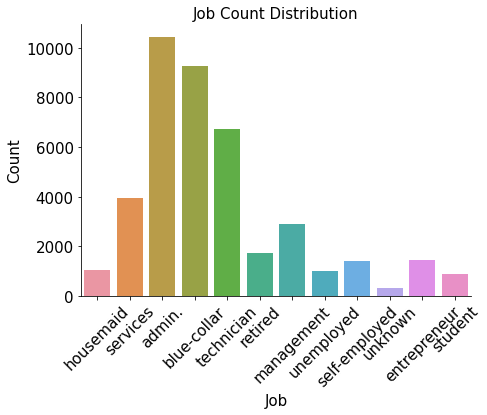

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
plt.xticks(rotation=45)
sns.despine()

婚姻狀態分佈

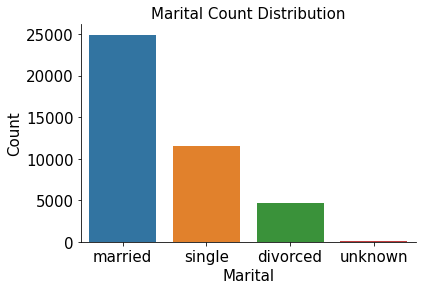

In [12]:
fig, ax = plt.subplots()
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

教育水平分佈

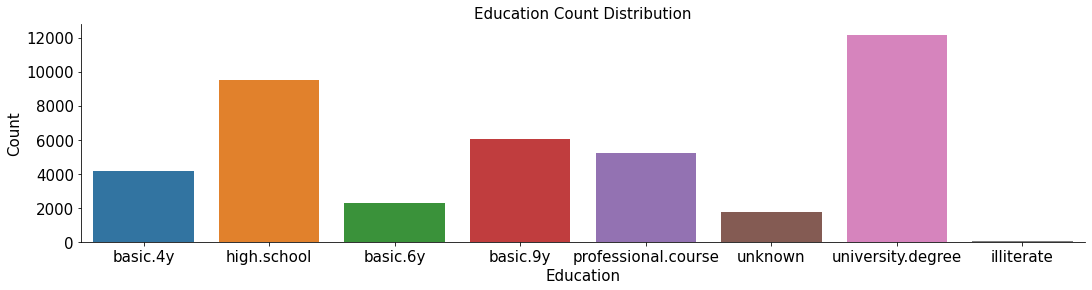

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 4)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

信用、房貸、個人貸款

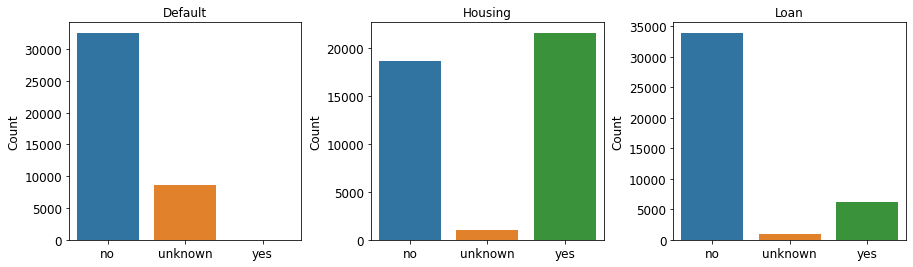

In [14]:
# Default
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(labelsize=12)

# Housing
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=12)
ax2.tick_params(labelsize=12)

# Loan
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=12)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=12)
ax3.tick_params(labelsize=12)

plt.subplots_adjust(wspace=0.3)

#### 電話銷售資料：

In [15]:
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


持續時間

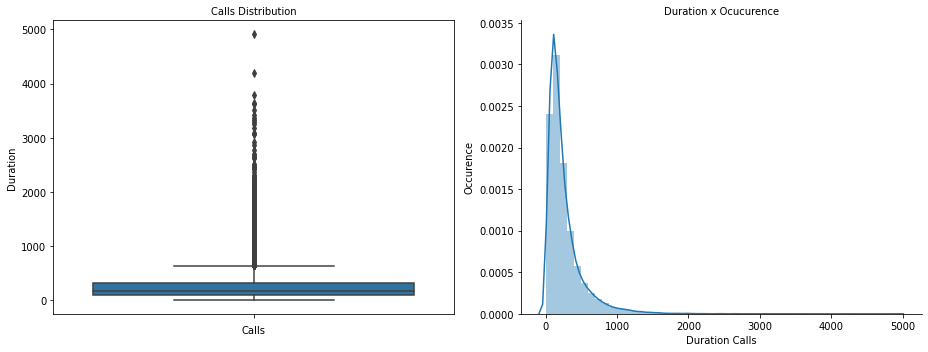

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

通訊方式, 月份, 星期

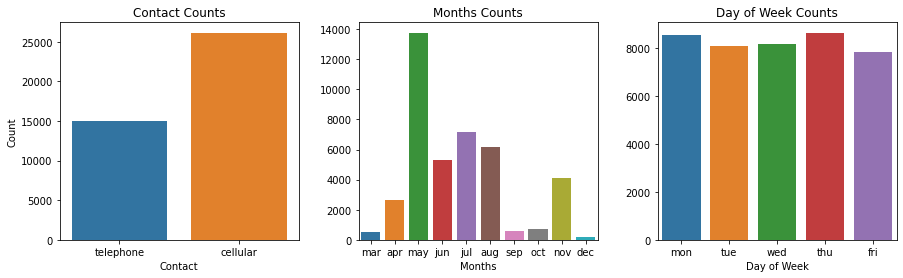

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

#### 其他特徵：

In [18]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


#### 社會經濟指標：

In [19]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


### 2. 資料前處理(Encoding)

+ 由於模型只認數字，因此要將類別進行編碼(Encoding)。例如：將y的yes/no轉換成1/0。
+ 編碼後的變數又可稱為虛擬變數(dummy variables)。
+ 只需要n-1個虛擬變數就可以表達成n個類別。例如：性別(男/女)為2個類別，但只需要1個虛擬變數就可以表達2個類別(0/1)。

#### Encoding的方式有兩種：

1. 將「類別變數」經過套件自動轉換成數字表示：
+ pandas 套件的 get_dummies() function 可以直接作轉換。
    + 此 function 有n個類別就會產生n欄。
+ sklearn.preprocessing 套件的 LabelEncoder()。
    + 此 function 會直接把一欄裡面的n個類別以(0~n-1)數字去作轉換。
2. 將「連續變數」依照自定義的區間分類：要分成幾類可透過商業知識、根據資料探索而得。

In [20]:
set(bank['y']) # set函數可以印出該欄位中的所有類別

{'no', 'yes'}

In [21]:
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = 'y', drop_first = True) # drop_first是因為第一欄為y_no，但我們只需要一欄代表即可，並且選擇yes的為1,no的為0。
y.tail()

,y_yes
41183,1
41184,0
41185,0
41186,1
41187,0


In [22]:
from sklearn.preprocessing import LabelEncoder # 載入encoding套件
labelencoder = LabelEncoder() # 呼叫function
# 顧客資料
bank_client['job'] = labelencoder.fit_transform(bank_client['job']) # 將資料餵給LabelEncoder
bank_client['marital'] = labelencoder.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder.fit_transform(bank_client['education']) 
bank_client['default'] = labelencoder.fit_transform(bank_client['default']) 
bank_client['housing'] = labelencoder.fit_transform(bank_client['housing']) 
bank_client['loan'] = labelencoder.fit_transform(bank_client['loan']) 
# 電話銷售資料
bank_related['contact'] = labelencoder.fit_transform(bank_related['contact']) 
bank_related['month'] = labelencoder.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder.fit_transform(bank_related['day_of_week']) 
# 其他特徵
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True) # 因為只有一個變數且三種類別，就自行寫程式轉換

我們此處採用統計方法的四分位距、異常值來將年齡、持續時間轉換成4個類別。<br>
異常值計算複習：
+ 上界：Q1 - 1.5 * IQR 
+ 下界：Q3 + 1.5 * IQR
+ IQR = Q3 - Q1

In [23]:
# 印出四分位距
print(f'Q1: {bank_client["age"].quantile(q = 0.25)}')
print(f'Q2: {bank_client["age"].quantile(q = 0.50)}')
print(f'Q3: {bank_client["age"].quantile(q = 0.75)}')
print(f'Q4: {bank_client["age"].quantile(q = 1.00)}')
# 計算異常值
print(f'Ages above: {bank_client["age"].quantile(q = 0.75) + 1.5*(bank_client["age"].quantile(q = 0.75) - bank_client["age"].quantile(q = 0.25))} are outliers.')

Q1: 32.0
Q2: 38.0
Q3: 47.0
Q4: 98.0
Ages above: 69.5 are outliers.


In [24]:
def age_enc(dataframe): # 自行定義一個分類的function
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
    return dataframe

age_enc(bank_client)

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0
41184,2,1,1,5,0,0,0
41185,3,5,1,6,0,2,0
41186,2,9,1,5,0,0,0


In [25]:
# 印出四分位距
print(f'Q1: {bank_related["duration"].quantile(q = 0.25)}')
print(f'Q2: {bank_related["duration"].quantile(q = 0.50)}')
print(f'Q3: {bank_related["duration"].quantile(q = 0.75)}')
print(f'Q4: {bank_related["duration"].quantile(q = 1.00)}')
# 計算異常值
print(f'Duration above: {bank_related["duration"].quantile(q = 0.75) + 1.5*(bank_related["duration"].quantile(q = 0.75) - bank_related["duration"].quantile(q = 0.25))} are outliers.')

Q1: 102.0
Q2: 180.0
Q3: 319.0
Q4: 4918.0
Duration above: 644.5 are outliers.


In [26]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related)

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3
...,...,...,...,...
41183,0,7,0,4
41184,0,7,0,4
41185,0,7,0,3
41186,0,7,0,4


#### 整併資料

In [27]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [28]:
bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,3,3,1,0,0,0,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,3,7,1,3,1,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,2,7,1,3,0,2,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,2,0,1,1,0,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,3,7,1,3,0,0,2,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1


#### 標準化

In [29]:
from sklearn.preprocessing import StandardScaler
bank_final_scale = StandardScaler().fit_transform(bank_final)
pd.DataFrame(data=bank_final_scale, columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome'])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,1.388231,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.348401,0.648092,0.722722,0.886447,0.712460,0.331680,-0.565922,0.195414,-0.349494,-0.372802
1,1.388231,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.459182,0.648092,0.722722,0.886447,0.712460,0.331680,-0.565922,0.195414,-0.349494,-0.372802
2,0.029072,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.348401,0.648092,0.722722,0.886447,0.712460,0.331680,-0.565922,0.195414,-0.349494,-0.372802
3,0.029072,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.459182,0.648092,0.722722,0.886447,0.712460,0.331680,-0.565922,0.195414,-0.349494,-0.372802
4,1.388231,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.348401,0.648092,0.722722,0.886447,0.712460,0.331680,-0.565922,0.195414,-0.349494,-0.372802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.747391,0.354824,-0.283741,0.586399,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,1.155985,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,-0.565922,0.195414,-0.349494,-0.372802
41184,0.029072,-0.757982,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,1.155985,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,-0.565922,0.195414,-0.349494,-0.372802
41185,1.388231,0.354824,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,0.348401,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,-0.204909,0.195414,-0.349494,-0.372802
41186,0.029072,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,1.155985,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,-0.565922,0.195414,-0.349494,-0.372802


### 3. 切割資料

由於前面已經載入過套件，這邊直接執行程式。

In [30]:
x_train, x_test, y_train, y_test = train_test_split(bank_final_scale, y, # x,y
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

### 4. 建立模型

#### 羅吉斯迴歸參數與特徵：

+ 常見參數
    + penalty：用來指定正規化中懲罰項所使用的方法函數，例如：L2正規化。
    + tol：Early Stopping的控制項，告訴優化算法何時停止；如果tol的值太大，則算法會在收斂之前停止。
    + C：正規化強度（係數λ）的倒數。
        + 必須是大於0的浮點數。與SVM一樣，較小的值代表更強的正規化，通常默認為1。
    + class_weight：用於給予各種類別的權重。
        + 不輸入：代表不考慮權重，所有類別重要性都一樣。
        + 自定義權重：例如：class_weight={0:0.9, 1:0.1}，代表對於0,1的二元模型，類別0的權重為90%、類別1的權重為10%。
        + balanced：模型會根據訓練樣本量來計算權重。
            + 類權重計算方法如下：n_samples / (n_classes * np.bincount(y))。
            + 某種類型樣本量越多，則權重越低，樣本量越少，則權重越高。
+ 常用模型特徵
    + coef_：取得模型係數。
    + intercept_：取得模型截距項。

+ 說明文件：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 。

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() 
model.fit(x_train, y_train)
pred = model.predict(x_test)

### 5. 衡量績效

+ 分類模型的衡量指標與迴歸模型不同，因為分類問題的猜測結果有四種情況：
    + 真實為1, 預測為1：True Positive, TP。
    + 真實為0, 預測為1：False Positive, FP，又稱「偽陽性」或統計學上的型一錯誤(Type I Error)。
    + 真實為1, 預測為0：False Negative, FN)，又稱「偽陰性」或統計學上的型二錯誤(Type II Error)。
    + 真實為0, 預測為0：True Negative, TN。
+ 上述四種情況通常會被畫成2x2的矩陣，又稱為「混淆矩陣(Confusion Matrix)」
+ 而分類指標的計算就圍繞著這個矩陣進行不同角度的計算(詳細請參考CH5)
+ 通常商業決策會將混淆矩陣衍生出的指標，搭配兩種猜錯情況所造成的「成本」一併考慮，因此沒有一定要使用哪種指標。

In [32]:
# 載入分類模型的衡量指標套件
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
# 印出混淆矩陣
cm = confusion_matrix(y_test, pred)
pd.DataFrame({'預測為0': cm[:,0], '預測為1': cm[:,1]}, index=['真實為0','真實為1']) 

,預測為0,預測為1
真實為0,10731,260
真實為1,845,521


In [33]:
print(f'True Positive Rate(TPR): {round(cm[1][1]/(cm[1][1]+cm[1][0]), 4)}') # 521/(521+845)
print(f'False Negative Rate(FNR): {round(cm[1][0]/(cm[1][0]+cm[1][1]), 4)}') # 845/(845+521)
print(f'Accuracy: {(round( ((cm[0][0]+cm[1][1]) / (cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])) , 4))}') # (521+10731)/(521+10731+260+845))

True Positive Rate(TPR): 0.3814
False Negative Rate(FNR): 0.6186
Accuracy: 0.9106


In [34]:
# 印出常見指標的分數(由混淆矩陣衍生)
pd.DataFrame({'Accuracy': accuracy_score(y_test, pred), 'AUC': roc_auc_score(y_test, model.decision_function(x_test)), 'Precision': precision_score(y_test, pred), 'Recall': recall_score(y_test, pred), 'F1': f1_score(y_test, pred)}, index=['value'])

,Accuracy,AUC,Precision,Recall,F1
value,0.910577,0.921862,0.667093,0.381406,0.485328


# 2-3: K-近鄰演算法 (KNeighbors, KNN)

## Regressor: 波士頓房價範例

In [35]:
x_train, x_test, y_train, y_test = train_test_split(boston['data'], boston['target'], # x,y
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

#### KNN(迴歸)參數與特徵：

+ 常見參數
    + n_neighbors：K值。
    + weights：預測中使用的權重函數。
        + uniform：統一權重，每個鄰域中的所有點的權重均相等。
        + distance：權重點與其距離的倒數。在這種情況下，查詢點的近鄰比遠處的近鄰具有更大的影響力。 
    + metrics：樹使用的距離度量，默認為：minkowski方法。

+ 說明文件：https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html 。

In [36]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

pd.DataFrame({'R-square': r2_score(y_test, pred), 'MAE': mean_absolute_error(y_test, pred), 'MSE': mean_squared_error(y_test, pred), 'RMSE': mean_squared_error(y_test, pred, squared=False)}, index=['value'])

,R-square,MAE,MSE,RMSE
value,0.430495,4.061711,37.014271,6.083935


從績效來看，雖然KNN也可以做迴歸，但真正表現較好、適合做迴歸的還是線性模型(Linear Regression)。

## Classifier: 銀行分類範例

In [37]:
x_train, x_test, y_train, y_test = train_test_split(bank_final_scale, y, # x,y
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

KNN(分類)參數與特徵：

+ 常見參數
    + n_neighbors：K值。
    + weights：預測中使用的權重函數。
        + uniform：統一權重，每個鄰域中的所有點的權重均相等。
        + distance：權重點與其距離的倒數。在這種情況下，查詢點的近鄰比遠處的近鄰具有更大的影響力。 
    + metrics：樹使用的距離度量，默認為：minkowski方法。
    
說明文件：https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 。

In [38]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5) # 設定K值 
model.fit(x_train, y_train)
pred = model.predict(x_test)

# 印出常見指標的分數
fpr, tpr, thresholds = roc_curve(y_test, pred) # 由於KNN的model沒有decision_function()，不能使用roc_auc_score計算他的AUC，因此這邊換了一種AUC的計算方式
pd.DataFrame({'Accuracy': accuracy_score(y_test, pred), 'AUC': auc(fpr, tpr), 'Precision': precision_score(y_test, pred), 'Recall': recall_score(y_test, pred), 'F1': f1_score(y_test, pred)}, index=['value'])

,Accuracy,AUC,Precision,Recall,F1
value,0.901351,0.666958,0.586166,0.366032,0.450653


我們可以很明顯的感覺到：KNN在面對大型資料集的時候，計算速度與其他模型相比較慢。<br>
並且在二元分類問題上，羅吉斯迴歸(Logistic)相較KNN表現特別突出。

# 2-3: 決策樹 (Decision Tree)

## Regressor: 波士頓房價範例

In [39]:
x_train, x_test, y_train, y_test = train_test_split(boston['data'], boston['target'], # x,y
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

決策樹(迴歸)參數與特徵：

+ 常見參數
    + criterion：衡量分割品質的功能。默認為：mse。
        + friedman_mse：來最小化L2損失，該方法使用均方誤差和弗里德曼(Friedman’s)改進分數作為潛在值分裂。
        + mae：代表平均絕對誤差，使用每個終端節點的中值使L1損失最小化。
        + poisson：則使用泊松偏差的減少來尋找分裂。
    + splitter：用於在每個節點上選擇切割的策略。
        + best：選擇最佳切割。
        + random：選擇最佳隨機切割。
    + max_depth：樹的最大深度。
        + None：會將節點展開，直到所有葉子都是純淨的(pure)，或者直到所有葉子都包含少於min_samples_split個樣本。
    + min_samples_split：分割內部節點所需的最少樣本數。
    + min_samples_leaf：在葉節點處需要的最小樣本數。
    + max_features：尋找最佳分割時要考慮的特徵數量。
    + max_leaf_nodes：以最佳優先方式種植帶有max_leaf_nodes的樹，最佳節點定義為雜質的相對減少。
        + None：葉節點數不受限制。
+ 常見特徵
    + feature_importances_：取得特徵的重要性。
    
說明文件：https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html 。

In [40]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

pd.DataFrame({'R-square': r2_score(y_test, pred), 'MAE': mean_absolute_error(y_test, pred), 'MSE': mean_squared_error(y_test, pred), 'RMSE': mean_squared_error(y_test, pred, squared=False)}, index=['value'])

,R-square,MAE,MSE,RMSE
value,0.655237,3.236184,22.407434,4.733649


由上面績效回報發現：決策樹做迴歸未必會比線性模型差，甚至還有過之而無不及的表現。

## Classifier: 鐵達尼號生存範例

鐵達尼存活率是一個很經典的分類教學問題。<br>
決策樹的樹形結構使模型能夠清楚了解來龍去脈，我們這裡選用故事背景家喻戶曉的鐵達尼號來講一個的精彩故事。<br>
想像一下：假如你今天是鐵達尼號的乘客，你是否能在這場浩劫中存活? 我們可以透過預測結果來回答你!<br>
資料來源：https://www.kaggle.com/c/titanic/data?select=train.csv 。

變數說明：
+ survival：是否存活。 (0 = No, 1 = Yes)
+ pclass：船票等級(數字愈小愈高等)。 (1 = 頭等艙, 2 = 商務艙, 3 = 經濟艙)
+ sex：性別。
+ Age：年齡(未滿1歲則以0.5計算)。
+ sibsp：一同登船的手足、配偶人數。	
+ parch：一同登船的父母、小孩人數。	
+ ticket：船票號。	
+ fare：旅客票價。	
+ cabin：船艙號。	
+ embarked：登船港口。 (C=瑟堡，Q=皇后鎮，S=南安普敦)

### 1. 載入與探索資料

這邊我們將介紹一個不使用套件內建資料、也不用下載就能直接取得資料並進行分析的方法。<br>
前提為你「擁有一個csv檔的下載連結」，或是透過下列方法取得：

+ 首先找到你要的資料集。
+ 右鍵複製下載檔案的連結網址(格式必須為csv檔，並且只能為單一個檔案，不能是多個檔案合併的壓縮檔下載連結)。
+ 把網址丟入read_csv內。

然而，上述動作看似簡單，直接輸入網址讓pandas幫你讀取資料，其實是會經過一連串繁雜的網路安全認證協定，有的人的電腦可能會出在其中發生問題，因此要使用ssl這個套件幫你處理。

【備註】<br>
但並非每個網頁都能讓你右鍵複製，例如：Kaggle就無法複製單一檔案的下載連結，只能複製壓縮檔的，且pandas不會幫你解壓縮。<br>
而我們湊巧在網路上找到Kaggle曾經舉辦模型競賽時所提供的鐵達尼號資料集下載連結，便拿這個網址做示範，順便帶大家認識一下一般資料分析競賽的進行方式。

參考資料：https://www.kaggle.com/ash316/eda-to-prediction-dietanic 。

### 比賽流程說明：

+ 假設一個完整的原始資料有10000筆資料。
+ 一般比賽時，主辦單位會將原始資料集切割成訓練資料(7000筆)與測試資料(3000筆)。
+ 主辦單位僅會提供訓練資料(7000筆)給參賽者。
+ 參賽者為了挑選出績效最好的模型與特徵組合，他們會將訓練資料當作原始資料，再進行切割。
+ 因此參賽者也會有訓練資料集(4900筆)跟測試資料集(2100筆)。
+ 接著資料分析的流程：拿訓練資料訓練模型、測試資料測試模型績效。
+ 等到比賽繳交截止日當天，主辦單位會釋出測試資料集(3000筆)給參賽者，並要求參賽者在很短的時間內將真正的測試資料(3000筆)餵進最終模型以交出預測結果。
+ 主辦單位將參賽者的預測結果與真正的測試資料進行比對，分數最高的獲勝。

我們仿照這個流程，因此一開始只有訓練資料：

In [41]:
# 進行網路協定設定
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# 載入資料
url = "https://kaggle-getting-started.s3-ap-northeast-1.amazonaws.com/titanic/train.csv" 
titanic = pd.read_csv(url) # 將網址餵給read_csv()

# 查看欄位訊息
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


從上面的資訊我們發現「年齡(Age)」、「船艙號(Cabin)」和「登船口(Embarked)」有NA值。

In [42]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


登船口分佈：

<AxesSubplot:xlabel='Embarked', ylabel='count'>

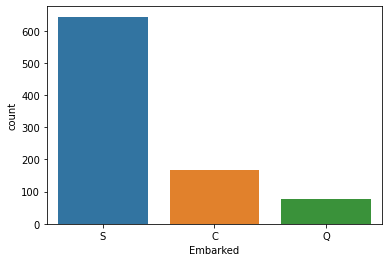

In [43]:
sns.countplot(titanic['Embarked'])

不同性別的存活人數：

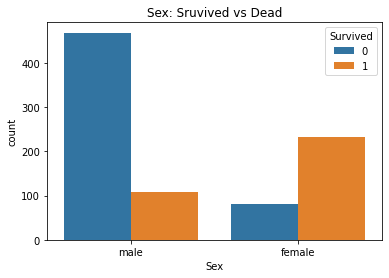

In [44]:
sns.countplot('Sex', hue='Survived', data=titanic)
plt.title('Sex: Sruvived vs Dead')
plt.show()

整體而言女性存活率較高，男性死亡率較高。

不同艙等的存活人數：

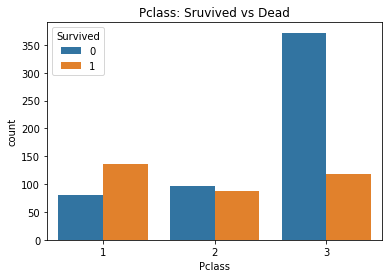

In [45]:
sns.countplot('Pclass', hue='Survived', data=titanic)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

從圖中可看出：頭等艙存活最多、經濟艙死亡人數最高。<br>
雖然我們常說：「金錢不能購買任何東西」，但是現實是很殘酷的，實際上有錢人被優先救援的比率確實較高。

將艙等與性別一同考慮：

In [46]:
pd.crosstab([titanic.Sex,titanic.Survived],titanic.Pclass,margins=True).style.background_gradient(cmap='summer_r')

頭等艙女性的存活率約為95-96％，而在救援過程中，無論班級如何，婦女都被優先考慮。因為即使是頭等艙的男性生存率也很低。<br>
從這個結論來看，PClass是一個很重要的變數。

年齡與艙等、年齡與性別的存活分佈(橫的看)

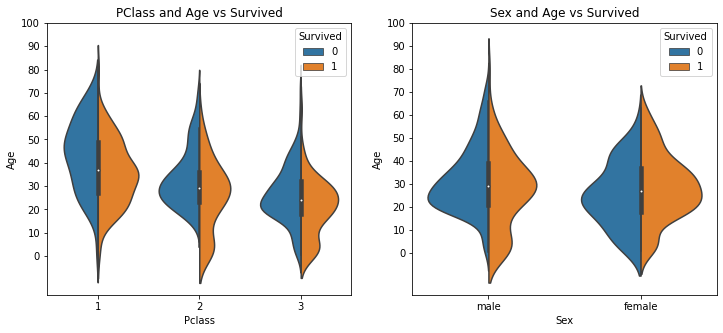

In [47]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.violinplot('Pclass','Age',hue='Survived',data=titanic,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=titanic,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

+ 兒童的數量從頭等艙增加到經濟艙，經濟艙的孩子數量大於其他兩個。
+ 10歲以下的兒童的存活率是良好的，而與經濟艙無關。
+ 20-30歲之間的對女性而言則更好。

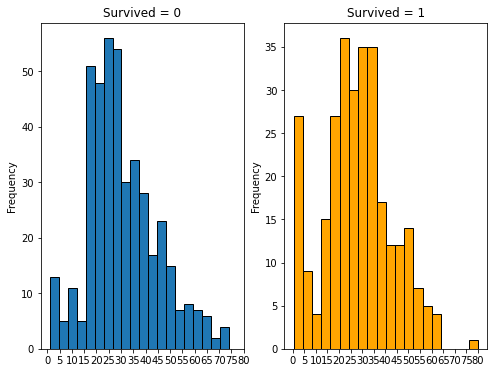

In [48]:
f,ax=plt.subplots(1,2,figsize=(8,6))
titanic[titanic['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
titanic[titanic['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='orange')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

+ 在救援過程中，兒童和婦女會被優先救援。
+ 倖存者中最老的乘客年齡為80歲。
+ 死亡人數最多為30-40歲(壯年)。

一同登船的家人數(家庭大小)與存活率

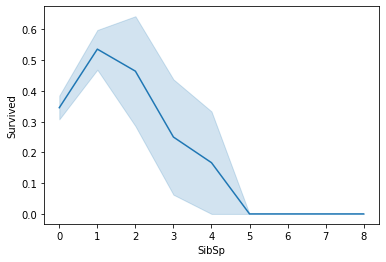

In [49]:
sns.lineplot('SibSp','Survived', data=titanic)
plt.show()

In [50]:
pd.crosstab(titanic.SibSp,titanic.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


明顯地可以看出：隨人家庭人數的增加，存活率會降低。如果在船上有家人，首先考慮的是整體存活而非自保，而危機發生時要所有人都倖免很困難，本來能存活下來的也可能因此錯過逃生時機。<br>
有5-8個成員的家庭的生存率是0％，而熱圖顯示家庭人數大於3人的乘客都在經濟艙中，幾乎所有住在經濟艙的大家族都會死亡。

### 2. 資料前處理

#### 填補NA

+ Age: 由於平均數容易受極端值影響，我們決定以中位數取代。
+ Embarked: 登船口因為只有三個地點且人們傾向到最大、人氣的港口登船，因此我們以最多的'S'填補。
+ Cabin: 因為缺失值實在太多，決定忽略此變數。根據常識，我們認為此變數與旅客的艙位等級(Pclass)和所付票價(fare)有關，其他變數已隱含足夠資訊量。

In [51]:
titanic["Age"].fillna(titanic["Age"].median(skipna=True), inplace=True)
titanic["Embarked"].fillna("S", inplace=True)
titanic.drop('Cabin', axis=1, inplace=True) # 將不要的變數丟掉

In [52]:
titanic.isnull().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### 製作新特徵

由於「SibSp」、「Parch」都代表乘客有家人一同共乘。在逃生時，家人是兄弟姊妹或是父母都是一樣重要的，因此我們決定以一個新變數來說明是否一個人搭乘即可。

In [53]:
titanic['TravelAlone']=np.where((titanic["SibSp"]+titanic["Parch"])>0, 0, 1) # np.where(規則, if符合條件則執行以下動作, else則執行以下動作)

#### 刪除不必要的變數

In [54]:
titanic.drop('SibSp', axis=1, inplace=True) 
titanic.drop('Parch', axis=1, inplace=True)
# 以下變數皆為識別用途(獨一性)，無分類意義且容易成為干擾，因此需剔除：
titanic.drop('PassengerId', axis=1, inplace=True) 
titanic.drop('Name', axis=1, inplace=True)
titanic.drop('Ticket', axis=1, inplace=True) 

#### Encoding

由於前面已經載入過套件，這邊直接呼叫function

In [55]:
labelencoder = LabelEncoder() 
titanic['Sex'] = labelencoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = labelencoder.fit_transform(titanic['Embarked']) 
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,22.0,7.2500,2,0
1,1,1,0,38.0,71.2833,0,0
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,0
4,0,3,1,35.0,8.0500,2,1


### 3. 建立模型與績效評估

#### 切割資料

In [56]:
x_train, x_test, y_train, y_test = train_test_split(titanic.iloc[:,1:], titanic['Survived'], # x,y
                                                    test_size=0.3, 
                                                    random_state=2021) # 設定seed，固定每次的訓練結果

#### 調校(最佳)參數
這裡通過調整模型參數(決策樹的最大深度)，來製作8個模型，並挑選最好的作為最終模型。

#### 決策樹的與特徵：

+ 常見參數
    + criterion：衡量分割品質的功能。默認為：mse。
        + friedman_mse：來最小化L2損失，該方法使用均方誤差和弗里德曼(Friedman’s)改進分數作為潛在值分裂。
        + mae：代表平均絕對誤差，使用每個終端節點的中值使L1損失最小化。
        + poisson：則使用泊松偏差的減少來尋找分裂。
    + splitter：用於在每個節點上選擇切割的策略。
        + best：選擇最佳切割。
        + random：選擇最佳隨機切割。
    + max_depth：樹的最大深度。
        + None：會將節點展開，直到所有葉子都是純淨的(pure)，或者直到所有葉子都包含少於min_samples_split個樣本。
    + min_samples_split：分割內部節點所需的最少樣本數。
    + min_samples_leaf：在葉節點處需要的最小樣本數。
    + max_features：尋找最佳分割時要考慮的特徵數量。
    + max_leaf_nodes：以最佳優先方式種植帶有max_leaf_nodes的樹，最佳節點定義為雜質的相對減少。
        + None：葉節點數不受限制。
+ 常見特徵
    + feature_importances_：取得特徵的重要性。
    

+ 細節參考文件：https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 。

In [57]:
from sklearn.tree import DecisionTreeClassifier

# 製作8個模型(最大樹的深度從2~10):
result = pd.DataFrame([])

for i in range(2,10): 

    model = DecisionTreeClassifier(max_depth=i) # 裡面還有很多函數可以設定，這邊我們只先調整樹的深度。
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    cm = confusion_matrix(y_test, pred)         # 混淆矩陣
    fpr, tpr, thresholds = roc_curve(y_test, pred)    
    result = result.append(pd.DataFrame({'max_depth': i, 'Accuracy': accuracy_score(y_test, pred), 'AUC': auc(fpr, tpr), 'Precision': precision_score(y_test, pred), 'Recall': recall_score(y_test, pred), 'F1': f1_score(y_test, pred), 'TPR': tpr[1], 'FNR': cm[1][0]/(cm[1][0]+cm[1][1])}, index=[i]), ignore_index=True)

result

,max_depth,Accuracy,AUC,Precision,Recall,F1,TPR,FNR
0,2,0.768657,0.713622,0.859649,0.475728,0.612500,0.475728,0.524272
1,3,0.798507,0.774345,0.775281,0.669903,0.718750,0.669903,0.330097
2,4,0.805970,0.763989,0.869565,0.582524,0.697674,0.582524,0.417476
3,5,0.805970,0.763989,0.869565,0.582524,0.697674,0.582524,0.417476
4,6,0.813433,0.782818,0.827160,0.650485,0.728261,0.650485,0.349515
5,7,0.805970,0.774934,0.814815,0.640777,0.717391,0.640777,0.359223
6,8,0.809701,0.781612,0.809524,0.660194,0.727273,0.660194,0.339806
7,9,0.798507,0.774345,0.775281,0.669903,0.718750,0.669903,0.330097


#### 如何挑選模型？
+ TPR(真實為1預測也為1)又稱作「Recall」或「Sensitivity」。
+ FPR(偽陽性)代表預測為1(存活)，實際為0(死亡)。
+ FNR(偽陰性)代表預測為0(死亡)，實際為1(存活)。

我們認為偽陽性的預測錯誤造成的代價遠大於其他種預測錯誤，並可能會使拿到報告的人輕忽了自己死亡的機率，因此就這個命題而言，我們應該選擇FPR愈小愈好的模型。 <br>
然而，若比賽有說明不管預測失敗的代價，排名要求是準確率高低的話，則我們應該採用模型4(acc=0.81)。

### 4. 比賽發放測試資料集

我們拿出主辦單位隱藏的測試資料集來產生模型預測結果：

In [58]:
test_url = "https://kaggle-getting-started.s3-ap-northeast-1.amazonaws.com/titanic/test.csv" 
testing = pd.read_csv(test_url)
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### 資料前處理

In [59]:
# 填補NA
testing["Age"].fillna(testing["Age"].median(skipna=True), inplace=True)
testing["Embarked"].fillna("S", inplace=True)
testing["Fare"].fillna(testing["Fare"].mean(skipna=True), inplace=True)
# 製作新變數
testing['TravelAlone']=np.where((testing["SibSp"]+testing["Parch"])>0, 0, 1) 
# 丟棄無用變數
testing.drop('SibSp', axis=1, inplace=True) 
testing.drop('Parch', axis=1, inplace=True)
testing.drop('Cabin', axis=1, inplace=True) 
testing.drop('PassengerId', axis=1, inplace=True) 
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True) 
# 編碼
labelencoder = LabelEncoder() 
testing['Sex'] = labelencoder.fit_transform(testing['Sex'])
testing['Embarked'] = labelencoder.fit_transform(testing['Embarked']) 
testing

,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,3,1,34.5,7.8292,1,1
1,3,0,47.0,7.0000,2,0
2,2,1,62.0,9.6875,1,1
3,3,1,27.0,8.6625,2,1
4,3,0,22.0,12.2875,2,0
...,...,...,...,...,...,...
413,3,1,27.0,8.0500,2,1
414,1,0,39.0,108.9000,0,1
415,3,1,38.5,7.2500,2,1
416,3,1,27.0,8.0500,2,1


In [60]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    int64  
 2   Age          418 non-null    float64
 3   Fare         418 non-null    float64
 4   Embarked     418 non-null    int64  
 5   TravelAlone  418 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


#### 最終模型與結果

+ 因為我們已經找到最佳模型的參數組合，並選用模型4(max_depth=6)作為最終模型。
+ 所以我們此處無需再進行資料切割，可以直接將所有訓練資料都輸入模型進行學習。
+ 接著，我們再把主辦單位提供的測試資料丟入學好的模型，將預測結果印出、存檔，即可上傳繳交。

In [61]:
model = DecisionTreeClassifier(max_depth=6)        # 最好的參數組合。
model.fit(titanic.iloc[:,1:], titanic['Survived']) # 原先餵的資料是切割後的x_train和y_train，現在不需要再切割，全部都可丟入學習。
pred = model.predict(testing)           # 丟入主辦單位的測試資料集來產出結果。

#### 畫出決策樹

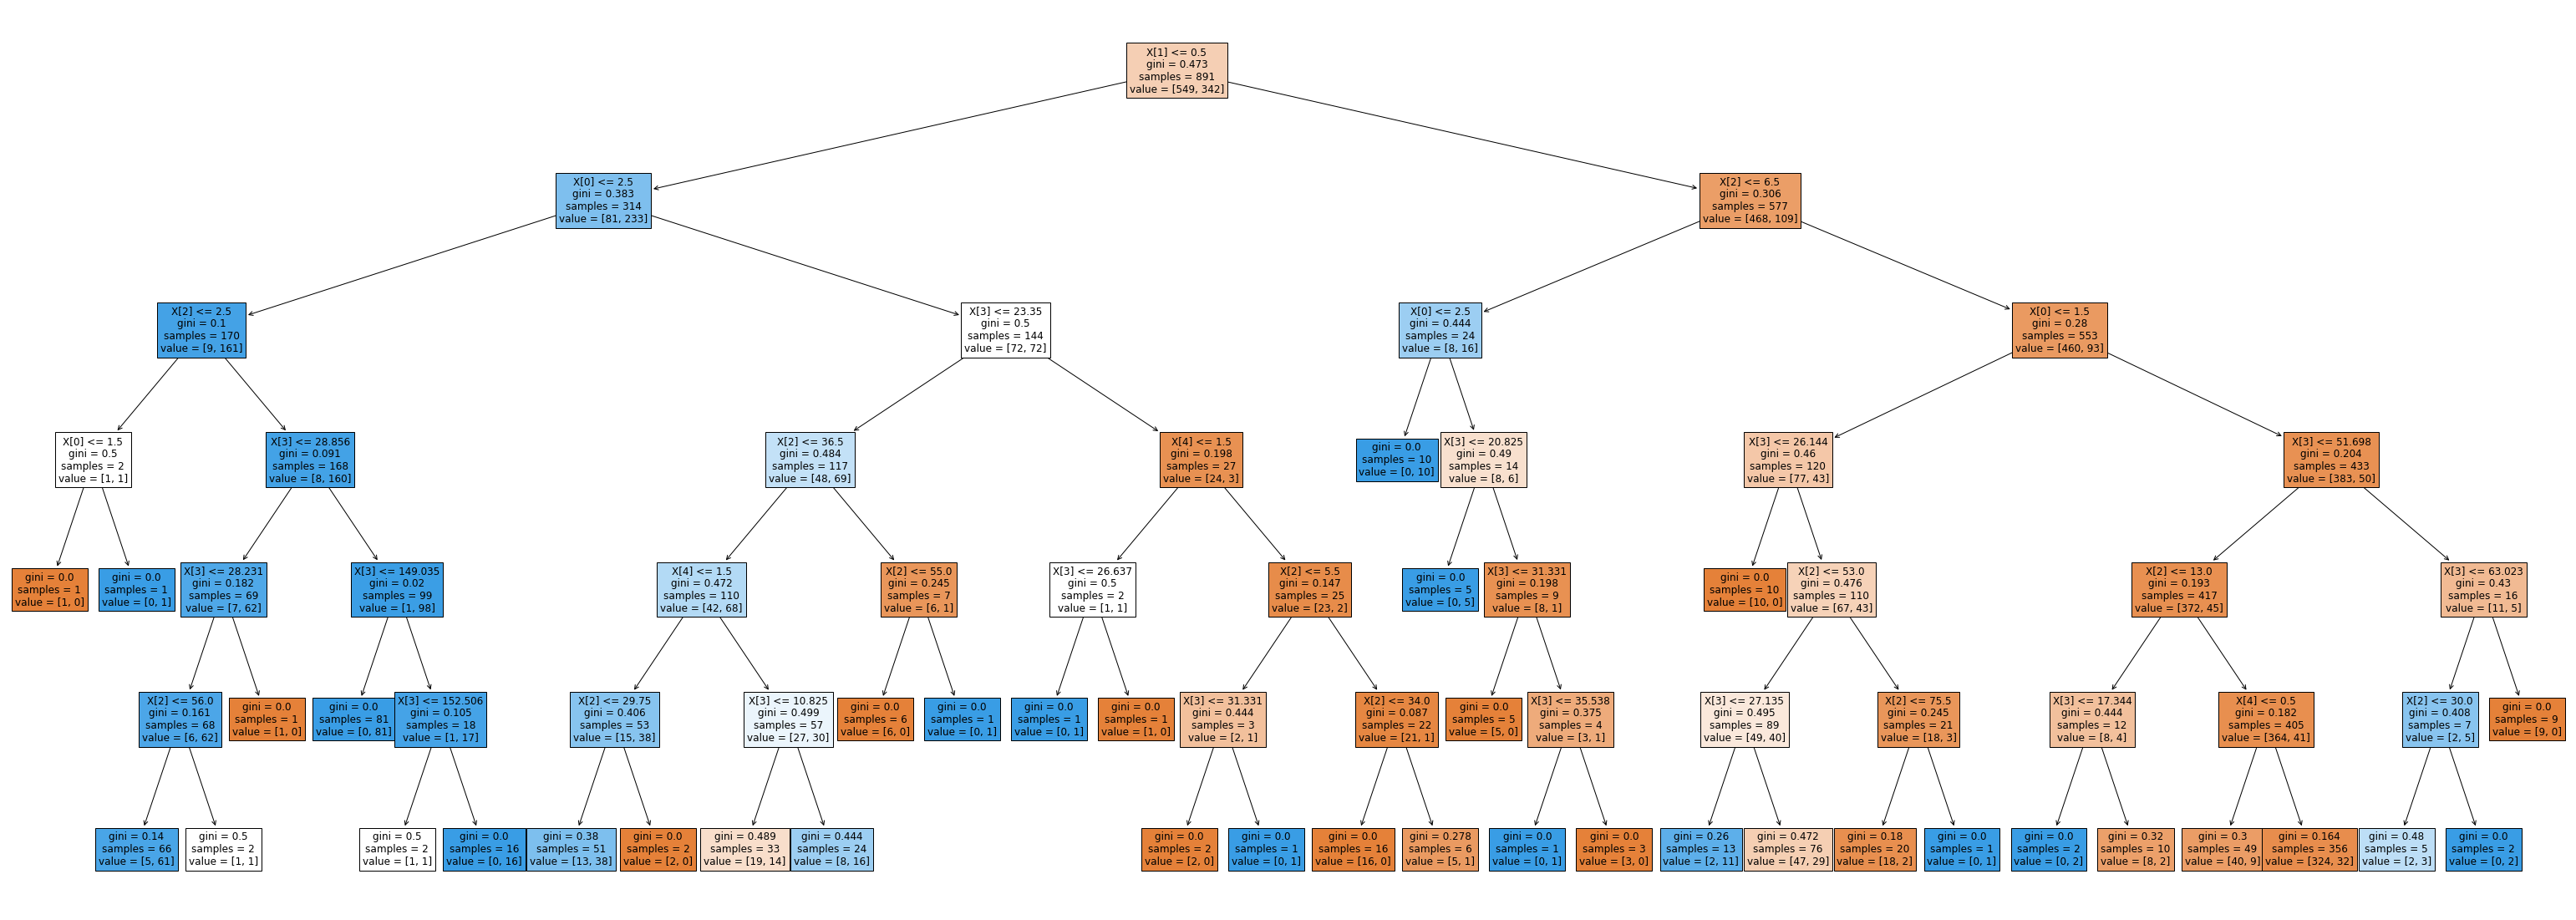

In [62]:
from sklearn import tree 

plt.figure(figsize=(55,20))
tree.plot_tree(model, filled=True, fontsize=12) # 畫圖
plt.show()

#### 印出結果

In [63]:
df = pd.read_csv(test_url)  # 由於先前我們將ID丟棄了，這樣無法知道是哪位乘客被預測會存活，因此這邊重新把資料讀回來
df = pd.DataFrame({'PassengerId':df['PassengerId'],'Survived':pred})
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
# 將結果匯出
df.to_csv('for_competition.csv') # 括號內填入想要儲存檔案的電腦路徑位置

### 5. (主辦方)驗證比賽模型的績效

將主辦方握有的答案與我們的結果比對： <br>
\[註\]我們沒有答案，因此下面使用predict出來的資料做取代，以展示主辦方是如何計算模型績效。

In [65]:
compare = pd.DataFrame({'PassengerId':df['PassengerId'], 'actual_y':pred, 'pred_y':pred}) # actual_y 應放入真實的答案(只有主辦握有並且即使比賽結束也不會公開給參賽者)
compare

,PassengerId,actual_y,pred_y
0,892,0,0
1,893,0,0
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [66]:
print(f"The model's correct ratio is: {round(sum(compare['actual_y'] == compare['pred_y'])/compare.shape[0], 4)}.")

The model's correct ratio is: 1.0.


以上分數即是我們模型的績效表現(準確度)。